---
title: "Making dual bar charts"
author: "Damien Martin"
date: "2024-04-28 12:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Populations pyramids often show not just the number of people in each age bracket, but also seggregate it by gender."
---

# Problem

Show a bar chart in two different directions from the central dividing line (two bars). 

The typical example is showing the male and female population by age bracket in a population pyramid.



# Solution

# Example 1


In [96]:
import pandas as pd
import plotnine as p9

pop = (
    pd.read_csv('2022_acs_us_pop.csv')
    [['age_bracket_label', 'pop_male', 'pop_female']]
    .rename(
        columns={'pop_male': 'male', 'pop_female': 'female'}
    ).melt(
        'age_bracket_label',
        var_name='gender',
        value_name='population'
    )
)
pop.head()

,age_bracket_label,gender,population
0,Under 5 years,male,9725644
1,5 to 9 years,male,10210019
2,10 to 14 years,male,10974635
3,15 to 19 years,male,11196816
4,20 to 24 years,male,11400730


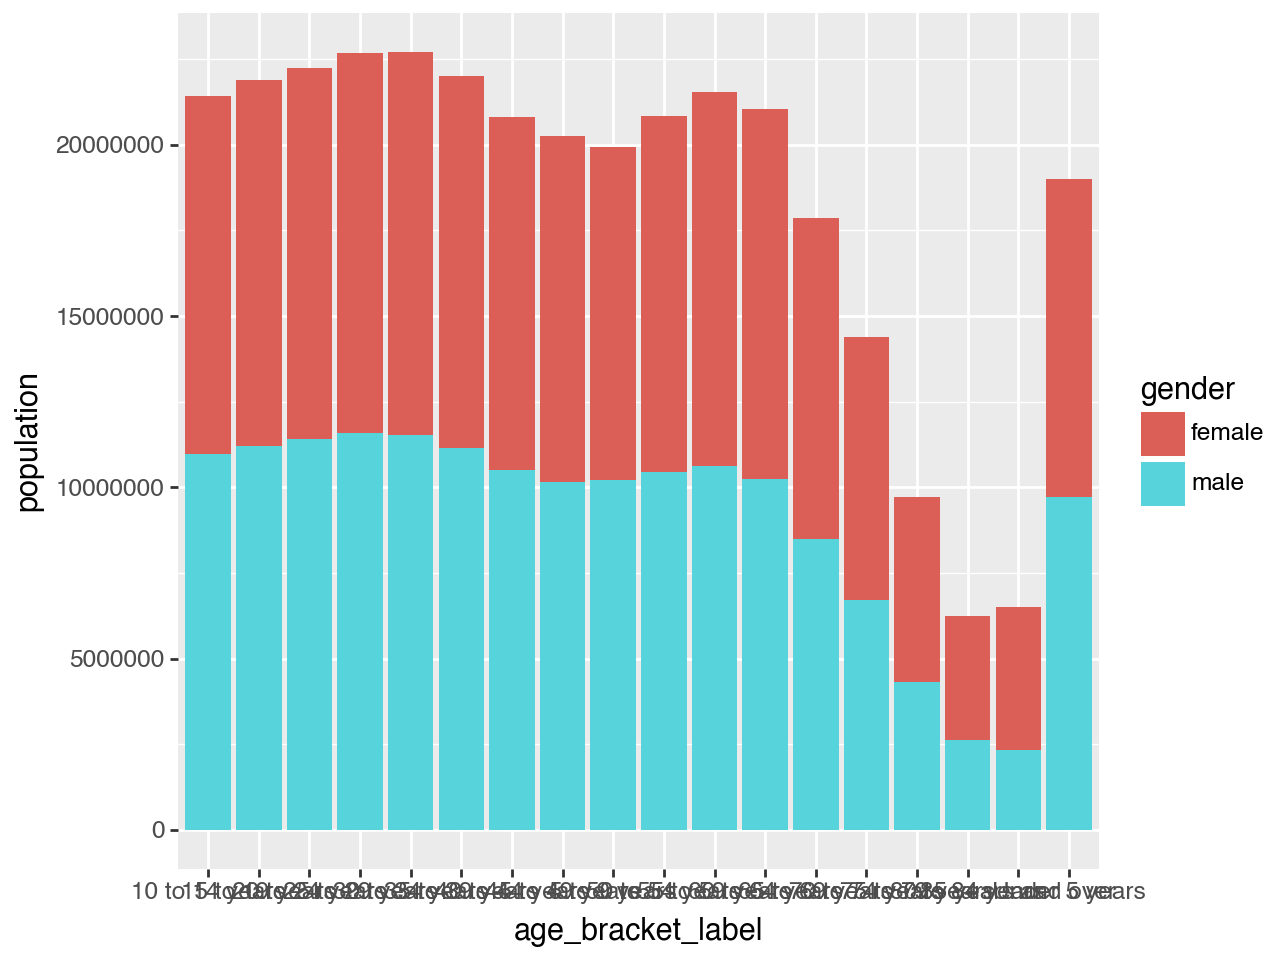

In [97]:
(
    p9.ggplot(pop, p9.aes(x='age_bracket_label', y='population', fill='gender'))
    + p9.geom_bar(stat='identity')
)

In [123]:
pop['signed_pop'] = pop.apply(lambda row:  row.population if row.gender == 'male'  else -row.population, axis=1)
# We are ending one side of the rectangle on 0,
# and the other side on 'signed_pop', so the center is 
# half of the signed_pop
pop['center'] = pop['signed_pop'] / 2

In [124]:
pop.age_bracket_label.unique().tolist()

['Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 29 years',
 '30 to 34 years',
 '35 to 39 years',
 '40 to 44 years',
 '45 to 49 years',
 '50 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 69 years',
 '70 to 74 years',
 '75 to 79 years',
 '80 to 84 years',
 '85 years and over']

The `p9.geom_tile` takes an `x`, `y`, `width` and `height` to draw a filled rectangle. The `x` and `y` positions are the locations are the "center" of the rectangle, which is why we have calculated the `center` attribute.

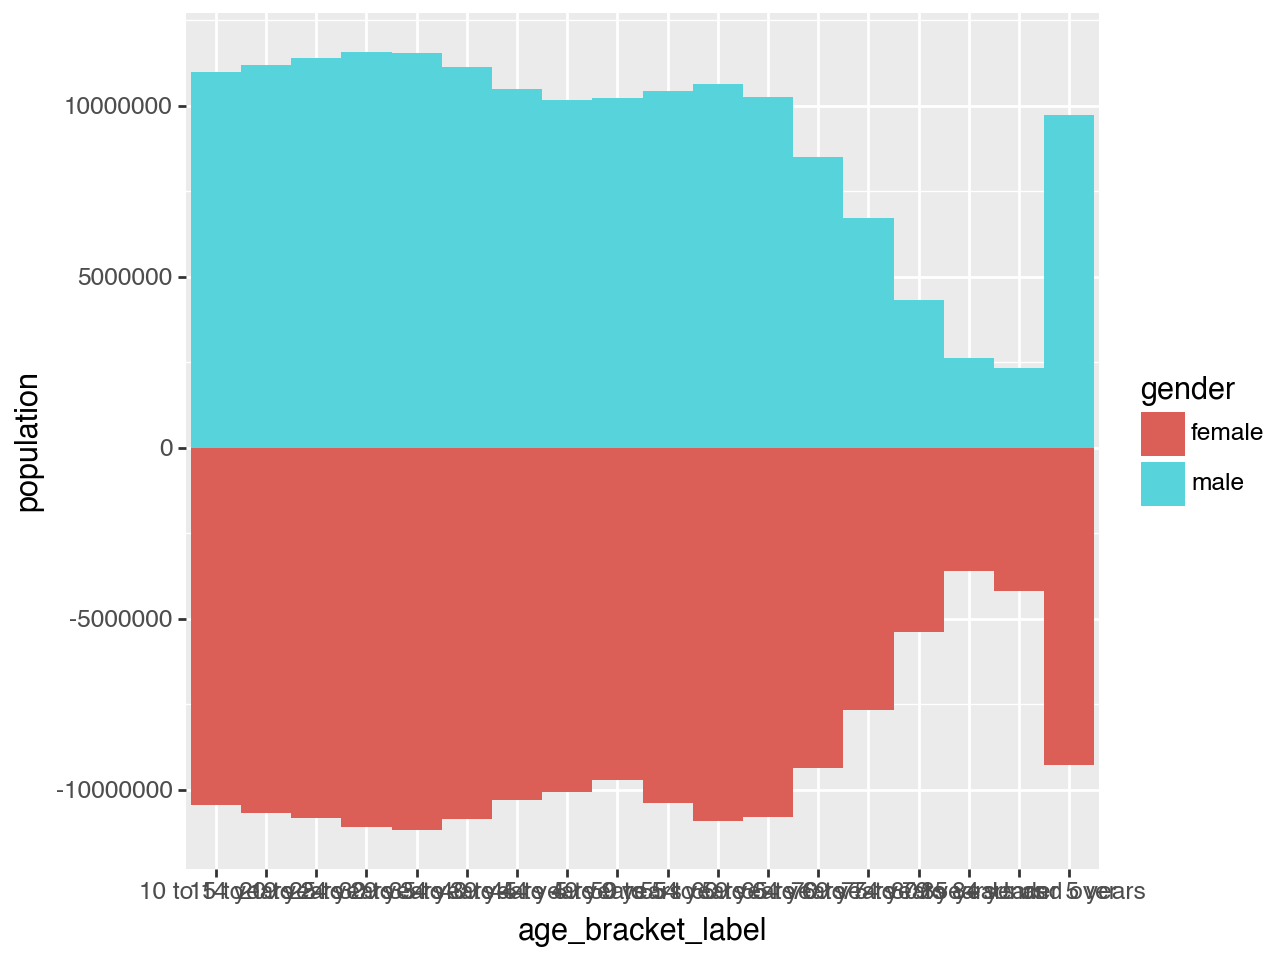

In [125]:
(
    p9.ggplot(pop, p9.aes(x='age_bracket_label', y='population', fill='gender'))
    + p9.geom_tile(mapping=p9.aes(y='center', width=1, height='signed_pop'))
)

We can rotate the text, but let's swap the axes. We will also order the categories correctly. 

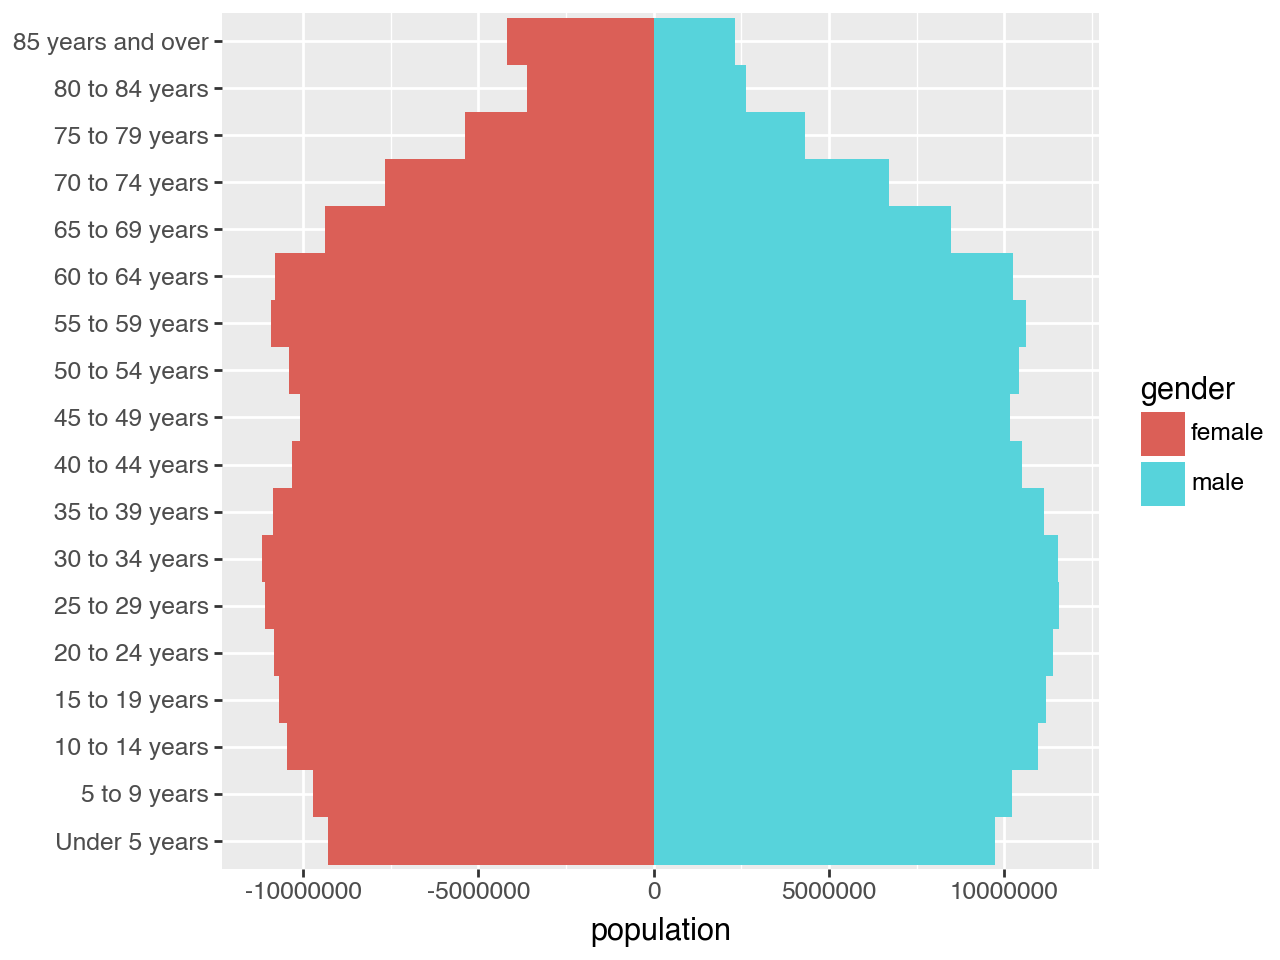

In [126]:
(
    p9.ggplot(pop, p9.aes(y='age_bracket_label', x='population', fill='gender'))
    + p9.geom_tile(mapping=p9.aes(x='center', height=1, width='signed_pop'))
    + p9.labs(y="")
    # This gets the order the same as they appear in the dataframe
    # (otherwise is alphabetical)
    + p9.scale_y_discrete(limits=pop.age_bracket_label.unique().tolist())
)

Let's also format the population, so we are not showing the female population as negative

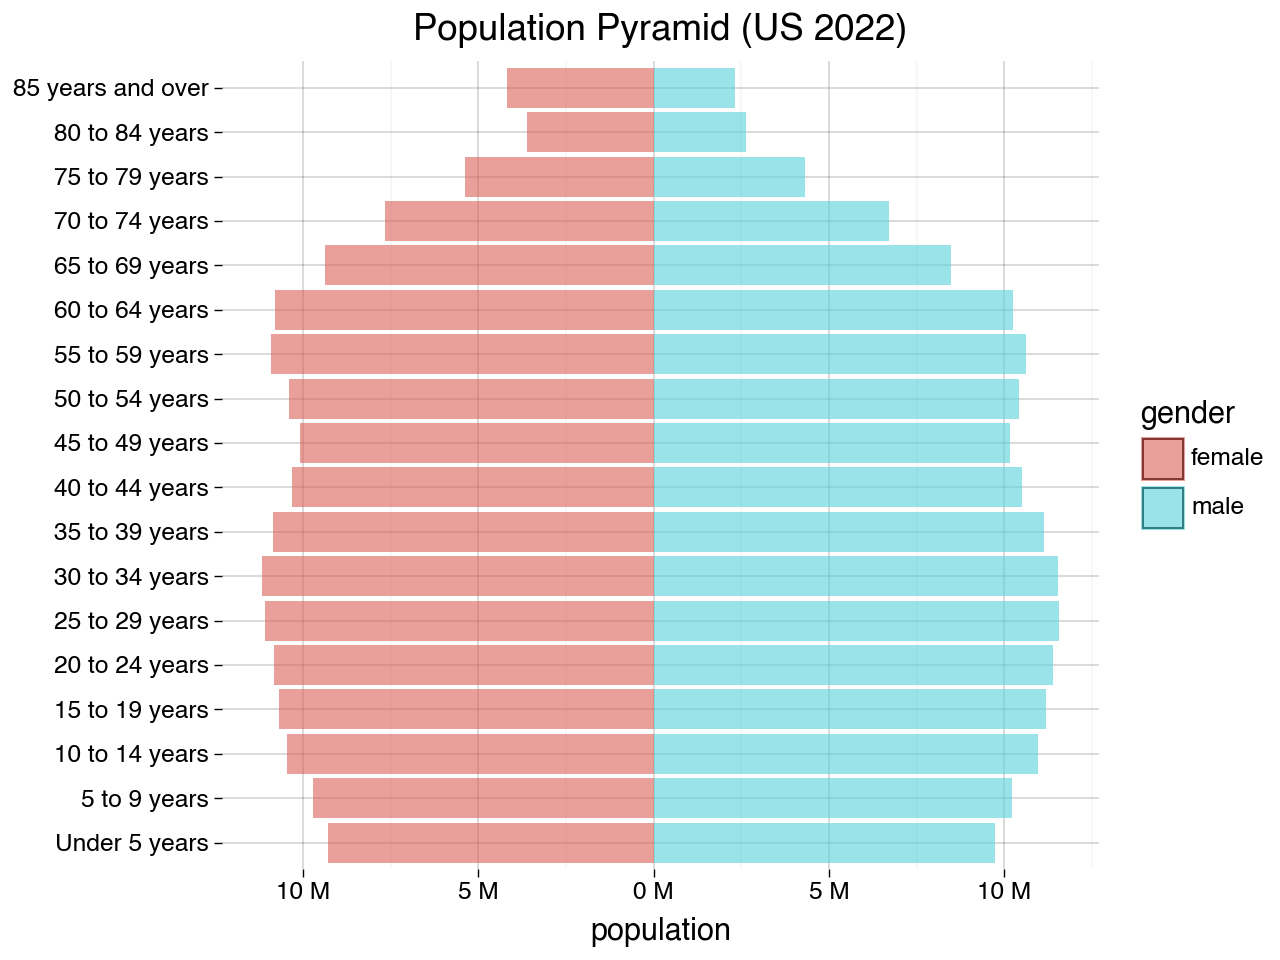

In [127]:
(
    p9.ggplot(pop, p9.aes(y='age_bracket_label', x='population', fill='gender'))
    + p9.geom_tile(mapping=p9.aes(x='center', height=0.9, width='signed_pop'), alpha=0.6)
    + p9.labs(y="", title="Population Pyramid (US 2022)")
    # This gets the order the same as they appear in the dataframe
    # (otherwise is alphabetical)
    + p9.scale_y_discrete(limits=pop.age_bracket_label.unique().tolist())
    + p9.scale_x_continuous(labels=lambda labs: [f"{abs(l/1e6):.0f} M" for l in labs])
    + p9.theme_linedraw()
    + p9.theme(panel_border=p9.element_blank())
)

# Example 2

This example is taken from the ggplot examples of Albert Rapp (the original post is called ["How to create diverging bar plots"](https://albert-rapp.de/posts/ggplot2-tips/22_diverging_bar_plot/22_diverging_bar_plot)).